# Linear regression, the usual way (using scikit-learn)

In [1]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)

In [4]:
X_train[:2]

array([[  3.58090000e-01,   0.00000000e+00,   6.20000000e+00,
          1.00000000e+00,   5.07000000e-01,   6.95100000e+00,
          8.85000000e+01,   2.86170000e+00,   8.00000000e+00,
          3.07000000e+02,   1.74000000e+01,   3.91700000e+02,
          9.71000000e+00],
       [  1.58760000e-01,   0.00000000e+00,   1.08100000e+01,
          0.00000000e+00,   4.13000000e-01,   5.96100000e+00,
          1.75000000e+01,   5.28730000e+00,   4.00000000e+00,
          3.05000000e+02,   1.92000000e+01,   3.76940000e+02,
          9.88000000e+00]])

In [5]:
y_train[:2]

array([ 26.7,  21.7])

In [6]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.mean_, scaler.scale_

(array([  3.36157176e+00,   1.17945545e+01,   1.11234406e+01,
          6.93069307e-02,   5.55885644e-01,   6.30179703e+00,
          6.90272277e+01,   3.77024158e+00,   9.40346535e+00,
          4.02844059e+02,   1.84623762e+01,   3.58785446e+02,
          1.27061881e+01]),
 array([  8.12086396e+00,   2.36076347e+01,   6.98435113e+00,
          2.53975353e-01,   1.15057872e-01,   6.93831576e-01,
          2.80721481e+01,   2.07800639e+00,   8.65042138e+00,
          1.70645434e+02,   2.19210336e+00,   8.85536380e+01,
          7.28999160e+00]))

In [7]:
X_train[:2]

array([[-0.36984756, -0.49960763, -0.70492455,  3.66450153, -0.42487874,
         0.93567804,  0.69366877, -0.4372179 , -0.16224243, -0.56165616,
        -0.48463784,  0.3716906 , -0.41100022],
       [-0.39439298, -0.49960763, -0.04487755, -0.27288841, -1.24185891,
        -0.49118121, -1.8355285 ,  0.73005474, -0.62464765, -0.57337637,
         0.33649132,  0.20501196, -0.38768057]])

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)

Coefficients: 
 [-0.96159409  1.05656121  0.04090558  0.59488677 -1.85972668  2.5681145
 -0.08549475 -2.88145804  2.1088358  -1.87464517 -2.29511322  0.72792395
 -3.59864933]
Intercept: 
 22.6118811881


In [9]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

train_mse = np.mean((pred_train - y_train) ** 2)
test_mse = np.mean((pred_test - y_test) ** 2)

print("Mean squared error (train/test): {} / {}".format(np.round(train_mse,2), np.round(test_mse,2)))
print("R square (train/test): {} / {}".format(np.round(model.score(X_train, y_train), 2),
                                              np.round(model.score(X_test, y_test), 2)))

Mean squared error (train/test): 19.33 / 33.45
R square (train/test): 0.77 / 0.59


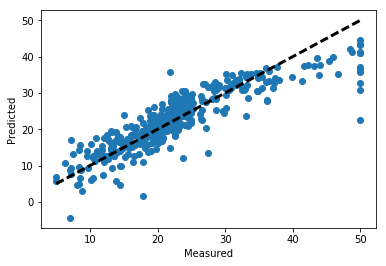

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

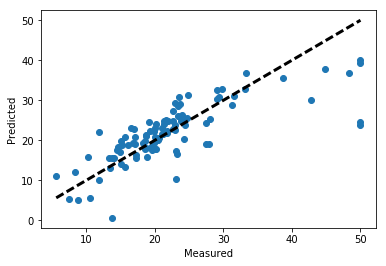

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()